# QAOA CON QISKIT

En este notebook, aprenderemos a utilizar las funcionalidades de Qsikit para manejar problemas de optimización y resolverlos con ayuda del algoritmo QAOA

Comenzamos importando los paquetes que vamos a utilizar

In [1]:
from qiskit_optimization.problems import QuadraticProgram
from qiskit_optimization.converters import QuadraticProgramToQubo
from qiskit_optimization.converters import InequalityToEquality
from qiskit_optimization.converters import IntegerToBinary
from qiskit_optimization.converters import LinearEqualityToPenalty
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit.algorithms.optimizers import COBYLA

from qiskit import Aer
from qiskit.algorithms import QAOA, NumPyMinimumEigensolver
from qiskit.quantum_info import Pauli
from qiskit.opflow.primitive_ops import PauliOp
from qiskit.opflow.list_ops import SummedOp
from qiskit.opflow import I, X, Y, Z

## Creando el hamiltoniano directamente

Podemos resolver problemas en Qiskit con QAOA a partir de un hamiltoniano del que ya dispongamos o que creemos explícitamente. Como ejemplo, vamos a crear un hamiltoniano sencillo y encontrar su estado de mínima energía con QAOA. Primero, construímos el hamiltoniano, inicializamos el QAOA y dibujamos el circuito.

El hamiltoniano es ZZ


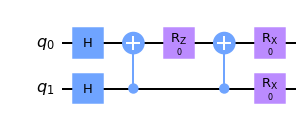

In [2]:
op = PauliOp(Pauli("ZZ")) # Equivale a Pauli(([1,1],[0,0])). 
                          # El primer array indica posiciones de las Zs y el segundo, de las Xs
print("El hamiltoniano es",op)

qaoa = QAOA(optimizer = COBYLA(), quantum_instance=Aer.get_backend('aer_simulator'), reps = 1)  
qaoa.construct_circuit([0,0],op)[0].draw(output="mpl")

Ahora, usamos el algoritmo para buscar un estado de mínima energía

In [3]:
result = qaoa.compute_minimum_eigenvalue(op)
print(result)

{   'aux_operator_eigenvalues': None,
    'cost_function_evals': 24,
    'eigenstate': {   '01': 0.7008644216251814,
                      '10': 0.7126096406869612,
                      '11': 0.03125},
    'eigenvalue': (-0.998046875+0j),
    'optimal_parameters': {   ParameterVectorElement(t[0]): 7.08583921342735,
                              ParameterVectorElement(t[1]): -0.3932572517985048},
    'optimal_point': array([ 7.08583921, -0.39325725]),
    'optimal_value': -0.998046875,
    'optimizer_evals': None,
    'optimizer_time': 0.10390806198120117}


Ahora, probamos con un problema más complicado

El hamiltoniano es -1.0 * ZZ
- 0.5 * ZI
- 1.0 * IZ


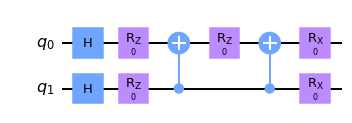

In [4]:
op = -PauliOp(Pauli("ZZ")) -0.5*PauliOp(Pauli("ZI")) - PauliOp(Pauli("IZ"))
# Otra forma de hacer lo mismo op = SummedOp([PauliOp(Pauli("ZZ"),-1),PauliOp(Pauli("ZI"),-0.5),PauliOp(Pauli("IZ"),-1)])
print("El hamiltoniano es",op)
qaoa = QAOA(optimizer = COBYLA(), quantum_instance=Aer.get_backend('aer_simulator'), reps = 1)  
qaoa.construct_circuit([0,0],op)[0].draw(output="mpl")

In [5]:
result = qaoa.compute_minimum_eigenvalue(op)
print(result)

{   'aux_operator_eigenvalues': None,
    'cost_function_evals': 33,
    'eigenstate': {   '00': 0.8297448779594846,
                      '01': 0.32775276505317236,
                      '10': 0.21875,
                      '11': 0.39528470752104744},
    'eigenvalue': (-1.4863281250000002+0j),
    'optimal_parameters': {   ParameterVectorElement(t[0]): 5.147871450830544,
                              ParameterVectorElement(t[1]): -3.897443557179072},
    'optimal_point': array([ 5.14787145, -3.89744356]),
    'optimal_value': -1.4863281250000002,
    'optimizer_evals': None,
    'optimizer_time': 0.1222829818725586}


Probamos aumentando el valor de $p$

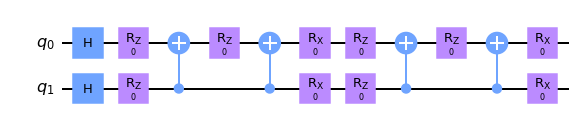

In [6]:
qaoa = QAOA(optimizer = COBYLA(), quantum_instance=Aer.get_backend('aer_simulator'), reps = 2)  
qaoa.construct_circuit([0,0,0,0],op)[0].draw(output="mpl")

In [7]:
result = qaoa.compute_minimum_eigenvalue(op)
print(result)

{   'aux_operator_eigenvalues': None,
    'cost_function_evals': 52,
    'eigenstate': {   '00': 0.9291292967074066,
                      '01': 0.16237976320958225,
                      '10': 0.32021721143623744,
                      '11': 0.08838834764831845},
    'eigenvalue': (-2.0712890625+0j),
    'optimal_parameters': {   ParameterVectorElement(t[0]): 1.2990551345749868,
                              ParameterVectorElement(t[1]): 1.5944564985506997,
                              ParameterVectorElement(t[2]): -5.913849439022427,
                              ParameterVectorElement(t[3]): -0.7524628082424797},
    'optimal_point': array([ 1.29905513,  1.5944565 , -5.91384944, -0.75246281]),
    'optimal_value': -2.0712890625,
    'optimizer_evals': None,
    'optimizer_time': 0.19306397438049316}


Probemos con un problema con más qubits

El hamiltoniano es 1.0 * ZZIII
+ 1.0 * ZIZII
+ 1.0 * IZZII
+ 1.0 * IZIZI
+ 1.0 * IIZIZ
+ 1.0 * IIIZZ


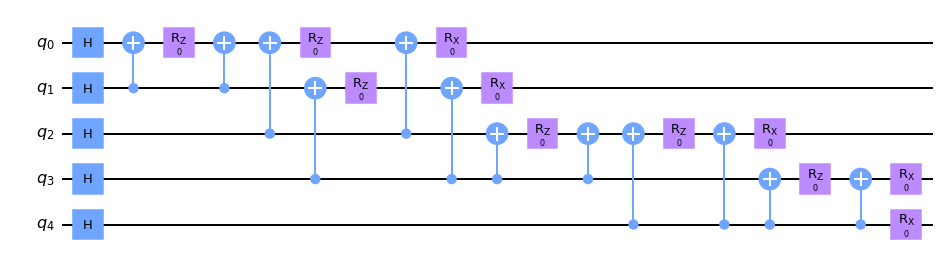

In [8]:
# Corresponde al problema de D-Wave con J = {(0,1):1,(0,2):1,(1,2):1,(1,3):1,(2,4):1,(3,4):1}

op = (Z^Z^I^I^I) + (Z^I^Z^I^I) + (I^Z^Z^I^I) + (I^Z^I^Z^I) + (I^I^Z^I^Z) + (I^I^I^Z^Z) # ¡Paréntesis necesarios!
print("El hamiltoniano es", op)
qaoa = QAOA(optimizer = COBYLA(), quantum_instance=Aer.get_backend('aer_simulator'), reps = 1)  
qaoa.construct_circuit([0,0,0,0],op)[0].draw(output="mpl")

In [9]:
result = qaoa.compute_minimum_eigenvalue(op)
print(result)

{   'aux_operator_eigenvalues': None,
    'cost_function_evals': 31,
    'eigenstate': {   '00000': 0.08267972847076846,
                      '00001': 0.14320549046737,
                      '00010': 0.14657549249448218,
                      '00011': 0.14657549249448218,
                      '00100': 0.19008632907181935,
                      '00101': 0.1711632992203644,
                      '00110': 0.1711632992203644,
                      '00111': 0.08267972847076846,
                      '01000': 0.15934435979977452,
                      '01001': 0.17399263633843817,
                      '01010': 0.14657549249448218,
                      '01011': 0.08838834764831845,
                      '01100': 0.1875,
                      '01101': 0.31093357409581873,
                      '01110': 0.3125,
                      '01111': 0.10364452469860624,
                      '10000': 0.09882117688026186,
                      '10001': 0.31715286140913185,
                      '100

## Trabajando con problemas cuadráticos

Qiskit proporciona herramientas para definir problemas cuadráticos y convertirlos en hamiltonianos que podemos usar con QAOA. También define clases que podemos usar para resolver estos problemas de forma transparente. Veamos cómo funcionan. 

Definimos un problema cuadrático con restricciones

In [10]:
qp = QuadraticProgram()
qp.binary_var('x')
qp.binary_var('y')
qp.binary_var('z')

# Añadimos el objetivo

qp.minimize(linear = {'y':-1}, quadratic = {('x','y'):2, ('z','y'):-4})

# Añadimos una restricción lineal

qp.linear_constraint(linear = {'x':1, 'y':2, 'z':3}, sense ="<=", rhs = 5)

print(qp)

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: CPLEX

Minimize
 obj: - y + [ 4 x*y - 8 y*z ]/2
Subject To
 c0: x + 2 y + 3 z <= 5

Bounds
 0 <= x <= 1
 0 <= y <= 1
 0 <= z <= 1

Binaries
 x y z
End



Ahora, podemos resolver este problema de forma exacta

In [11]:
np_solver = NumPyMinimumEigensolver()
np_optimizer = MinimumEigenOptimizer(np_solver)
result = np_optimizer.solve(qp)
print(result)

optimal function value: -5.0
optimal value: [0. 1. 1.]
status: SUCCESS


Podemos resolver el problema también con QAOA

In [12]:
qaoa_optimizer = MinimumEigenOptimizer(qaoa)
result = qaoa_optimizer.solve(qp)
print(result)

optimal function value: -5.0
optimal value: [0. 1. 1.]
status: SUCCESS


Para obtener más información sobre los resultados:

In [13]:
print('Orden de las variables:', [var.name for var in result.variables])
for s in result.samples:
    print(s)

Orden de las variables: ['x', 'y', 'z']
SolutionSample(x=array([0., 1., 1.]), fval=-5.0, probability=0.091796875, status=<OptimizationResultStatus.SUCCESS: 0>)
SolutionSample(x=array([0., 1., 0.]), fval=-1.0, probability=0.044921875, status=<OptimizationResultStatus.SUCCESS: 0>)
SolutionSample(x=array([1., 0., 1.]), fval=0.0, probability=0.1640625, status=<OptimizationResultStatus.SUCCESS: 0>)
SolutionSample(x=array([0., 0., 1.]), fval=0.0, probability=0.2275390625, status=<OptimizationResultStatus.SUCCESS: 0>)
SolutionSample(x=array([1., 0., 0.]), fval=0.0, probability=0.130859375, status=<OptimizationResultStatus.SUCCESS: 0>)
SolutionSample(x=array([0., 0., 0.]), fval=0.0, probability=0.138671875, status=<OptimizationResultStatus.SUCCESS: 0>)
SolutionSample(x=array([1., 1., 0.]), fval=1.0, probability=0.1591796875, status=<OptimizationResultStatus.SUCCESS: 0>)
SolutionSample(x=array([1., 1., 1.]), fval=-3.0, probability=0.04296875, status=<OptimizationResultStatus.INFEASIBLE: 2>)


Y para obtener la misma información que con el QAOA:

In [14]:
print(result.min_eigen_solver_result)

{   'aux_operator_eigenvalues': None,
    'cost_function_evals': 26,
    'eigenstate': {   '000000': 0.04419417382415922,
                      '000001': 0.12103072956898178,
                      '000010': 0.05412658773652741,
                      '000011': 0.08838834764831845,
                      '000100': 0.13975424859373686,
                      '000101': 0.24803918541230538,
                      '000110': 0.14320549046737,
                      '000111': 0.07654655446197431,
                      '001000': 0.05412658773652741,
                      '001001': 0.13975424859373686,
                      '001010': 0.10825317547305482,
                      '001011': 0.19008632907181935,
                      '001100': 0.2557922741210141,
                      '001101': 0.04419417382415922,
                      '001110': 0.16828640022295324,
                      '001111': 0.13975424859373686,
                      '010000': 0.14657549249448218,
                      '010001': 0.

# El proceso en más detalle

La conversión que se hace internamente sigue varios pasos. El primero es convertir las restricciones de desiguladades en restricciones de igualdad

In [15]:
ineq_to_eq = InequalityToEquality()
qp_eq = ineq_to_eq.convert(qp)
print(qp_eq)

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: CPLEX

Minimize
 obj: - y + [ 4 x*y - 8 y*z ]/2
Subject To
 c0: x + 2 y + 3 z + c0@int_slack = 5

Bounds
 0 <= x <= 1
 0 <= y <= 1
 0 <= z <= 1
       c0@int_slack <= 5

Binaries
 x y z

Generals
 c0@int_slack
End



A continuación, se convierten las variables enteras en binarias.

In [16]:
int_to_bin = IntegerToBinary()
qp_bin = int_to_bin.convert(qp_eq)
print(qp_bin)

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: CPLEX

Minimize
 obj: - y + [ 4 x*y - 8 y*z ]/2
Subject To
 c0: x + 2 y + 3 z + c0@int_slack@0 + 2 c0@int_slack@1 + 2 c0@int_slack@2 = 5

Bounds
 0 <= x <= 1
 0 <= y <= 1
 0 <= z <= 1
 0 <= c0@int_slack@0 <= 1
 0 <= c0@int_slack@1 <= 1
 0 <= c0@int_slack@2 <= 1

Binaries
 x y z c0@int_slack@0 c0@int_slack@1 c0@int_slack@2
End



Ahora, se convierten las restricciones en penalizaciones en el objetivo

In [17]:
eq_to_pen = LinearEqualityToPenalty()
qubo = eq_to_pen.convert(qp_bin)
print(qubo)

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: CPLEX

Minimize
 obj: - 80 x - 161 y - 240 z - 80 c0@int_slack@0 - 160 c0@int_slack@1
      - 160 c0@int_slack@2 + [ 16 x^2 + 68 x*y + 96 x*z + 32 x*c0@int_slack@0
      + 64 x*c0@int_slack@1 + 64 x*c0@int_slack@2 + 64 y^2 + 184 y*z
      + 64 y*c0@int_slack@0 + 128 y*c0@int_slack@1 + 128 y*c0@int_slack@2
      + 144 z^2 + 96 z*c0@int_slack@0 + 192 z*c0@int_slack@1
      + 192 z*c0@int_slack@2 + 16 c0@int_slack@0^2
      + 64 c0@int_slack@0*c0@int_slack@1 + 64 c0@int_slack@0*c0@int_slack@2
      + 64 c0@int_slack@1^2 + 128 c0@int_slack@1*c0@int_slack@2
      + 64 c0@int_slack@2^2 ]/2 + 200
Subject To

Bounds
 0 <= x <= 1
 0 <= y <= 1
 0 <= z <= 1
 0 <= c0@int_slack@0 <= 1
 0 <= c0@int_slack@1 <= 1
 0 <= c0@int_slack@2 <= 1

Binaries
 x y z c0@int_slack@0 c0@int_slack@1 c0@int_slack@2
End



Podríamos hacer lo mismo en un solo paso

In [18]:
qp_to_qubo = QuadraticProgramToQubo()
qubo2 = qp_to_qubo.convert(qp)
print(qubo2)

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: CPLEX

Minimize
 obj: - 80 x - 161 y - 240 z - 80 c0@int_slack@0 - 160 c0@int_slack@1
      - 160 c0@int_slack@2 + [ 16 x^2 + 68 x*y + 96 x*z + 32 x*c0@int_slack@0
      + 64 x*c0@int_slack@1 + 64 x*c0@int_slack@2 + 64 y^2 + 184 y*z
      + 64 y*c0@int_slack@0 + 128 y*c0@int_slack@1 + 128 y*c0@int_slack@2
      + 144 z^2 + 96 z*c0@int_slack@0 + 192 z*c0@int_slack@1
      + 192 z*c0@int_slack@2 + 16 c0@int_slack@0^2
      + 64 c0@int_slack@0*c0@int_slack@1 + 64 c0@int_slack@0*c0@int_slack@2
      + 64 c0@int_slack@1^2 + 128 c0@int_slack@1*c0@int_slack@2
      + 64 c0@int_slack@2^2 ]/2 + 200
Subject To

Bounds
 0 <= x <= 1
 0 <= y <= 1
 0 <= z <= 1
 0 <= c0@int_slack@0 <= 1
 0 <= c0@int_slack@1 <= 1
 0 <= c0@int_slack@2 <= 1

Binaries
 x y z c0@int_slack@0 c0@int_slack@1 c0@int_slack@2
End



Finalmente, podemos recuperar el hamiltoniano correspondiente al problema

In [19]:
op, offset = qubo.to_ising()
print("El hamiltoniano es", op)
print("Y la constante es", offset)

El hamiltoniano es -8.0 * ZIIIII
- 8.0 * IZIIII
+ 16.0 * ZZIIII
- 4.0 * IIZIII
+ 8.0 * ZIZIII
+ 8.0 * IZZIII
- 11.0 * IIIZII
+ 24.0 * ZIIZII
+ 24.0 * IZIZII
+ 12.0 * IIZZII
- 7.0 * IIIIZI
+ 16.0 * ZIIIZI
+ 16.0 * IZIIZI
+ 8.0 * IIZIZI
+ 23.0 * IIIZZI
- 4.5 * IIIIIZ
+ 8.0 * ZIIIIZ
+ 8.0 * IZIIIZ
+ 4.0 * IIZIIZ
+ 12.0 * IIIZIZ
+ 8.5 * IIIIZZ
Y la constante es 47.0


Y usar QAOA directamente sobre este operador

In [20]:
result = qaoa.compute_minimum_eigenvalue(op)
print(result)

{   'aux_operator_eigenvalues': None,
    'cost_function_evals': 33,
    'eigenstate': {   '000000': 0.06987712429686843,
                      '000001': 0.10364452469860624,
                      '000010': 0.04419417382415922,
                      '000011': 0.06987712429686843,
                      '000100': 0.04419417382415922,
                      '000101': 0.15309310892394862,
                      '000110': 0.16237976320958225,
                      '000111': 0.2633171804117612,
                      '001000': 0.07654655446197431,
                      '001001': 0.03125,
                      '001010': 0.09882117688026186,
                      '001011': 0.10825317547305482,
                      '001100': 0.07654655446197431,
                      '001101': 0.15625,
                      '001110': 0.13975424859373686,
                      '001111': 0.2460627460628691,
                      '010000': 0.03125,
                      '010001': 0.05412658773652741,
               